In [19]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv("Full_Academic_History.csv").copy()

df[['Quarter', 'Year']] = df['Term'].str.extract(r'(\w+)\sQtr\s(\d{4})')

# 3. Map quarter names to representative months
quarter_to_month = {
    'Winter': 2,    # February
    'Spring': 5,    # May
    'Summer': 8,    # August
    'Fall':   11    # November
}
df['Month'] = df['Quarter'].map(quarter_to_month)

# 4. Create a timestamp column using the first day of that month
df['timestamp'] = pd.to_datetime(dict(year=df['Year'].astype(int),
                                      month=df['Month'].astype(int),
                                      day=1))
df = df.drop(columns = ["Quarter", "Year", "Month"])

# Now df is in true chronological order
mask = (df["Term"] == "Spring Qtr 2025") & df["Grade"].isna() & (df["Units"] == 4.0)
df.loc[mask, "Grade"] = "A(Projection)"
df.loc[mask, "Term GPA"] = 4
df.loc[mask, "Points"] = 16
mask = (df["Term"] == "Spring Qtr 2025") & df["Grade"].isna()
df.loc[mask, "Grade"] = "P(Projection)"

In [21]:
df


,Term,Subject,Course,Course Title,Units,Grade,Points,Repeat,Term GPA,timestamp
0,Spring Qtr 2025,CHIN,10CN,First-Year Chinese III,5.0,P(Projection),0.0,NaN,NaN,2025-05-01
1,Spring Qtr 2025,DSC,102,Systems for Scalable Analytics,4.0,A(Projection),16.0,NaN,4.0,2025-05-01
2,Spring Qtr 2025,DSC,106,Intro to Data Visualization,4.0,A(Projection),16.0,NaN,4.0,2025-05-01
3,Spring Qtr 2025,PHIL,131,Topics in Metaphysics,4.0,W,0.0,NaN,NaN,2025-05-01
4,Winter Qtr 2025,CHIN,10BD,First-Yr Chinese/Dialect II,5.0,P,0.0,NaN,NaN,2025-02-01
5,Winter Qtr 2025,DSC,140A,Probabilistic Modeling and ML,4.0,A-,14.8,NaN,NaN,2025-02-01
6,Winter Qtr 2025,ECON,120C,Econometrics C,4.0,A-,14.8,NaN,NaN,2025-02-01
7,Winter Qtr 2025,MATH,181E,Mathematics Statistic–Time Series,4.0,A,16.0,NaN,NaN,2025-02-01
8,Fall Qtr 2024,CHIN,10AD,First-Yr Chinese/Dialect I,5.0,P,0.0,NaN,NaN,2024-11-01
9,Fall Qtr 2024,COGS,11,Minds & Brains,4.0,P,0.0,NaN,NaN,2024-11-01


In [22]:
df = df.drop(columns = ["Repeat"])


In [23]:
# 1) build a mask of only the A–F courses
graded_mask = ~df["Grade"].isin(["P", "NP", "W", "", "P(Projection)"])

# 2) total up all the points per term (this includes every course, but P/NP/W have zero Points anyway)
points_sum = df.groupby("Term")["Points"].transform("sum")

# 3) total up the units per term, but only for the graded courses
units_per_term = (
    df.loc[graded_mask]
      .groupby("Term")["Units"]
      .sum()
)

# 4) map those unit‐totals back onto every row, and divide
df["Term GPA"] = points_sum / df["Term"].map(units_per_term)


In [24]:
df

,Term,Subject,Course,Course Title,Units,Grade,Points,Term GPA,timestamp
0,Spring Qtr 2025,CHIN,10CN,First-Year Chinese III,5.0,P(Projection),0.0,4.000000,2025-05-01
1,Spring Qtr 2025,DSC,102,Systems for Scalable Analytics,4.0,A(Projection),16.0,4.000000,2025-05-01
2,Spring Qtr 2025,DSC,106,Intro to Data Visualization,4.0,A(Projection),16.0,4.000000,2025-05-01
3,Spring Qtr 2025,PHIL,131,Topics in Metaphysics,4.0,W,0.0,4.000000,2025-05-01
4,Winter Qtr 2025,CHIN,10BD,First-Yr Chinese/Dialect II,5.0,P,0.0,3.800000,2025-02-01
5,Winter Qtr 2025,DSC,140A,Probabilistic Modeling and ML,4.0,A-,14.8,3.800000,2025-02-01
6,Winter Qtr 2025,ECON,120C,Econometrics C,4.0,A-,14.8,3.800000,2025-02-01
7,Winter Qtr 2025,MATH,181E,Mathematics Statistic–Time Series,4.0,A,16.0,3.800000,2025-02-01
8,Fall Qtr 2024,CHIN,10AD,First-Yr Chinese/Dialect I,5.0,P,0.0,3.566667,2024-11-01
9,Fall Qtr 2024,COGS,11,Minds & Brains,4.0,P,0.0,3.566667,2024-11-01


In [25]:
import pandas as pd

# 1) Re-compute term totals (using exactly your graded_mask logic)
graded_mask = ~df["Grade"].isin(["P", "NP", "W", "", "P(Projection)"])
term_points = df.groupby("Term")["Points"].sum()
term_units  = df.loc[graded_mask].groupby("Term")["Units"].sum()

term_summary = (
    pd.DataFrame({
        "Term":       term_points.index,
        "total_pts":  term_points.values,
        "total_units":term_units.values
    })
    # 2) Extract sortable year & quarter
    .assign(
        Year  = lambda d: d["Term"].str.extract(r"(\d{4})").astype(int)[0],
        QtrNo = lambda d: d["Term"]
                       .str.extract(r"^(Winter|Spring|Summer|Fall)")[0]
                       .map({"Winter":1,"Spring":2,"Summer":3,"Fall":4})
    )
    # 3) Sort chronologically
    .sort_values(["Year","QtrNo"])
    .reset_index(drop=True)
    # 4) Running totals
    .assign(
        cum_pts   = lambda d: d["total_pts"].cumsum(),
        cum_units = lambda d: d["total_units"].cumsum(),
        AccruedGPA= lambda d: d["cum_pts"] / d["cum_units"]
    )
)

# 5) If you want to see that term_summary:
print(term_summary[["Term","total_units","total_pts","AccruedGPA"]])

# 6) To merge the accrued GPA back onto your original df:
df = df.merge(
    term_summary[["Term","AccruedGPA"]],
    on="Term",
    how="left"
)
# Now df["AccruedGPA"] gives your cumulative GPA up through that term.


              Term  total_units  total_pts  AccruedGPA
0    Fall Qtr 2020         16.0       45.2    2.825000
1  Spring Qtr 2023         16.0       60.0    3.287500
2    Fall Qtr 2023         16.0       57.2    3.383333
3  Winter Qtr 2024         16.0       62.8    3.518750
4  Spring Qtr 2024         12.0       42.8    3.526316
5    Fall Qtr 2024         12.0       42.8    3.531818
6  Winter Qtr 2025         12.0       45.6    3.564000
7  Spring Qtr 2025          8.0       32.0    3.596296


In [26]:
titles = ["Preparing for the CFA Exam", "Data Analysis and Inference", "Probabilistic Modeling and ML", "Mathematics Statistic–Time Series", "Systems for Scalable Analytics"]
df["Important"] = df["Course Title"].isin(titles)
df

,Term,Subject,Course,Course Title,Units,Grade,Points,Term GPA,timestamp,AccruedGPA,Important
0,Spring Qtr 2025,CHIN,10CN,First-Year Chinese III,5.0,P(Projection),0.0,4.000000,2025-05-01,3.596296,False
1,Spring Qtr 2025,DSC,102,Systems for Scalable Analytics,4.0,A(Projection),16.0,4.000000,2025-05-01,3.596296,True
2,Spring Qtr 2025,DSC,106,Intro to Data Visualization,4.0,A(Projection),16.0,4.000000,2025-05-01,3.596296,False
3,Spring Qtr 2025,PHIL,131,Topics in Metaphysics,4.0,W,0.0,4.000000,2025-05-01,3.596296,False
4,Winter Qtr 2025,CHIN,10BD,First-Yr Chinese/Dialect II,5.0,P,0.0,3.800000,2025-02-01,3.564000,False
5,Winter Qtr 2025,DSC,140A,Probabilistic Modeling and ML,4.0,A-,14.8,3.800000,2025-02-01,3.564000,True
6,Winter Qtr 2025,ECON,120C,Econometrics C,4.0,A-,14.8,3.800000,2025-02-01,3.564000,False
7,Winter Qtr 2025,MATH,181E,Mathematics Statistic–Time Series,4.0,A,16.0,3.800000,2025-02-01,3.564000,True
8,Fall Qtr 2024,CHIN,10AD,First-Yr Chinese/Dialect I,5.0,P,0.0,3.566667,2024-11-01,3.531818,False
9,Fall Qtr 2024,COGS,11,Minds & Brains,4.0,P,0.0,3.566667,2024-11-01,3.531818,False


In [27]:
events = [
    {'timestamp': '2024-08-20', 'award_event': "CFA level I Exam \n(Passed)"},
    {'timestamp': '2025-08-28', 'award_event': "CFA level II Exam"},
    {'timestamp': '2025-05-02', 'award_event': "Halıcıoğlu Data Science Institute\nBest Project Award"},
    {'timestamp': '2024-06-13', 'award_event': "Rady School of Management\nEquity Valuation Competition Winner"}

    # …add yours…
]
events_df = pd.DataFrame(events)
events_df['timestamp'] = pd.to_datetime(events_df['timestamp'])
events_df


,timestamp,award_event
0,2024-08-20,CFA level I Exam \n(Passed)
1,2025-08-28,CFA level II Exam
2,2025-05-02,Halıcıoğlu Data Science Institute\nBest Projec...
3,2024-06-13,Rady School of Management\nEquity Valuation Co...


In [28]:
try:
    df["award_event"]
except:
    df = df.merge(events_df, on = "timestamp", how = "outer")

In [29]:
df

,Term,Subject,Course,Course Title,Units,Grade,Points,Term GPA,timestamp,AccruedGPA,Important,award_event
0,Fall Qtr 2020,TDGE,11,Great Performances on Film,4.0,B,12.0,2.825000,2020-11-01,2.825000,False,NaN
1,Fall Qtr 2020,MATH,20B,Calculus/Science & Engineering,4.0,C+,9.2,2.825000,2020-11-01,2.825000,False,NaN
2,Fall Qtr 2020,COGS,9,Introduction to Data Science,4.0,A-,14.8,2.825000,2020-11-01,2.825000,False,NaN
3,Fall Qtr 2020,DSC,10,Principles of Data Science,4.0,C+,9.2,2.825000,2020-11-01,2.825000,False,NaN
4,Spring Qtr 2023,DSC,20,Prgrmng/DataStruc for Data Sci,4.0,A,16.0,3.750000,2023-05-01,3.287500,False,NaN
5,Spring Qtr 2023,MATH,20C,Calculus&Analyt Geom/Sci&Engnr,4.0,A-,14.8,3.750000,2023-05-01,3.287500,False,NaN
6,Spring Qtr 2023,TDGE,10,Theatre and Film,4.0,B+,13.2,3.750000,2023-05-01,3.287500,False,NaN
7,Spring Qtr 2023,TDPW,1,Introduction to Playwriting,4.0,A+,16.0,3.750000,2023-05-01,3.287500,False,NaN
8,Fall Qtr 2023,DSC,30,DataStrc/Algrthms for Data Sci,4.0,B+,13.2,3.575000,2023-11-01,3.383333,False,NaN
9,Fall Qtr 2023,ECON,1,Principles of Microeconomics,4.0,A,16.0,3.575000,2023-11-01,3.383333,False,NaN


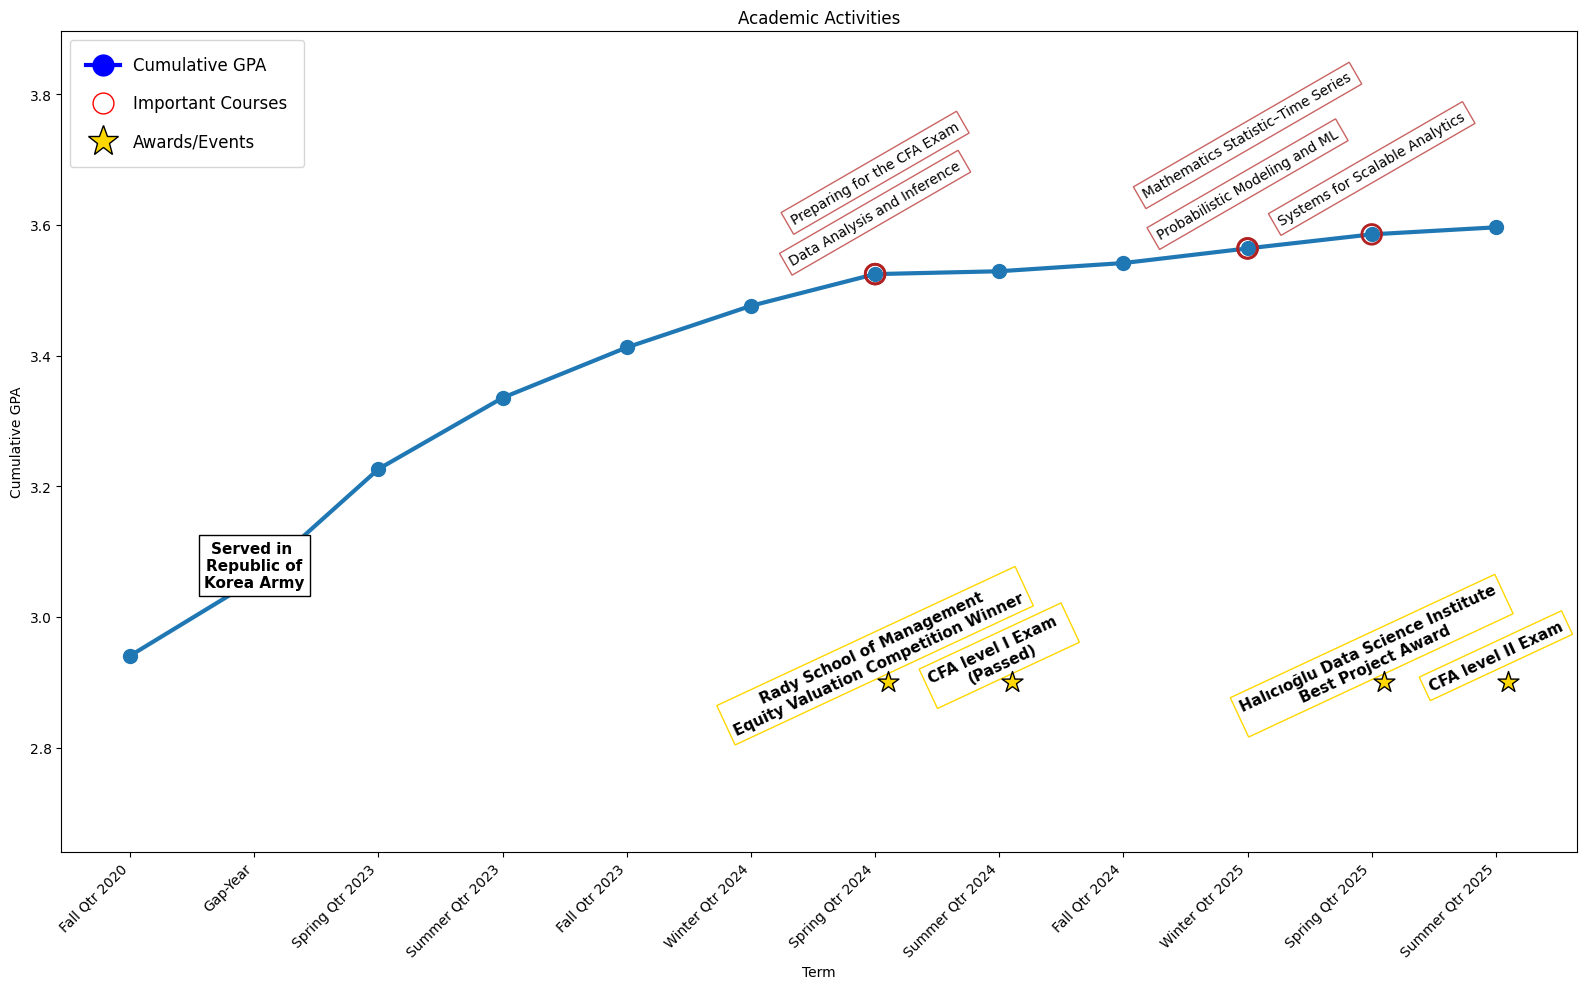

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict, Counter

# — assume `df` & `term_summary` are already defined:
#    df has columns ['Term','AccruedGPA','Important','timestamp','award_event', …]
#    term_summary has columns ['Term','AccruedGPA']

# ——— helper: map timestamp → quarter string ———
def ts_to_quarter(ts):
    y, m = ts.year, ts.month
    if   m >= 10: q = "Fall"
    elif m >=  7: q = "Summer"
    elif m >=  4: q = "Spring"
    else:          q = "Winter"
    return f"{q} Qtr {y}"

# ——— D) Inject missing quarters & merge timestamps ———
all_terms = [
    "Fall Qtr 2020", "Spring Qtr 2023", "Summer Qtr 2023",
    "Fall Qtr 2023", "Winter Qtr 2024", "Spring Qtr 2024", "Summer Qtr 2024",
    "Fall Qtr 2024", "Winter Qtr 2025", "Spring Qtr 2025", "Summer Qtr 2025"
]
term_summary["Term"] = pd.Categorical(
    term_summary["Term"],
    categories=all_terms, ordered=True
)
term_summary = (
    term_summary.set_index("Term")
                .reindex(all_terms)
                .reset_index()
)
# drop old timestamp if present
term_summary = term_summary.drop(columns=['timestamp'], errors='ignore')
# merge in real timestamps from df
term_summary = term_summary.merge(
    df[['Term','timestamp']].drop_duplicates(),
    on='Term', how='left'
)

# ——— 1) Build discrete x-axis ———
labels = term_summary["Term"].tolist()
gpas   = term_summary["AccruedGPA"].tolist()
# insert the “Gap-Year” placeholder
gap_idx = 1
labels.insert(gap_idx, "Gap-Year")
gpas.insert(gap_idx, np.nan)
gpas = pd.Series(gpas).interpolate().tolist()

# …and if you want a slightly smoother path overall,
# take a 3-term rolling mean (centered so endpoints don’t “drift”)
gpas = pd.Series(gpas).rolling(window=3, center=True, min_periods=1).mean().tolist()

# map Term → x-index
term_to_x = {t:i for i,t in enumerate(labels)}
x = np.arange(len(labels))

# ——— 2) Plot GPA ———
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(x, gpas, marker='o', linestyle='-', linewidth=3, markersize=10, label="GPA")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_xlabel("Term")
ax.set_ylabel("Cumulative GPA")
ax.set_title("Academic Activities")
# fixed y-limits
y_min, y_max = np.nanmin(gpas), np.nanmax(gpas)
ax.set_ylim(y_min - 0.3, y_max + 0.3)
# annotate service gap
ax.text(
    gap_idx, y_min + 0.1,
    "Served in \nRepublic of\nKorea Army",
    ha='center', va='bottom', fontweight='bold',fontsize=11,
    bbox=dict(
        facecolor="white",
        edgecolor="black"
    )
)

# ——— 3) Highlight Important courses WITH DYNAMIC SPACING ———
imp = df[df['Important'] == True].copy()
imp_counts   = Counter(imp['Term'])
band_imp     = 0.5
imp_spacing  = {term: band_imp/imp_counts[term] for term in imp_counts}
imp_seen     = defaultdict(int)

for _, row in imp.iterrows():
    term_at = row['Term']
    if term_at not in term_to_x:
        continue
    ix    = term_to_x[term_at]
    y_val = gpas[ix]
    cnt   = imp_seen[term_at]
    # baseline just above the GPA point
    y_base = y_val + 0.01
    # stagger upward within the term
    y_ann  = y_base + cnt * imp_spacing[term_at] * 0.25

    # circle marker at the point
    ax.scatter(ix, y_val, s=200, facecolors='none',
               edgecolors='firebrick', linewidth=2, zorder=5)
    # text label
    ax.text(
        ix, y_ann,
        row['Course Title'],
        rotation=30, ha='center', va='bottom',
        fontsize=10,
        bbox=dict( fc='white',edgecolor = "firebrick", alpha=0.7)
    )
    imp_seen[term_at] += 1

# ——— 4) Overlay Awards/Events in their actual quarter WITH DYNAMIC SPACING ———
events = df[df['award_event'].notna()].copy()
# map each event to its quarter
events['event_quarter'] = events['timestamp'].apply(ts_to_quarter)
evt_counts  = Counter(events['event_quarter'])
band_evt    = 0.3
evt_spacing = {term: band_evt/evt_counts[term] for term in evt_counts}
evt_seen    = defaultdict(int)

for _, row in events.iterrows():
    term_at = row['event_quarter']
    if term_at not in term_to_x or term_at == "Gap-Year":
        continue
    ix  = term_to_x[term_at]
    cnt = evt_seen[term_at]
    # baseline just below the GPA curve
    y_base = y_min 
    # stagger downward within the term
    y_ev   = y_base - cnt * evt_spacing[term_at]

    ax.scatter(ix+0.1, y_ev-0.04, marker='*', s=250,
               color='gold', edgecolors='black', zorder=6)
    ax.text(
        ix, y_ev,
        row['award_event'],
        rotation=25, ha='center', va='center',
        fontsize=11, fontweight='bold', 
        bbox=dict(
        facecolor="white",
        edgecolor="gold"
        )
    )
    evt_seen[term_at] += 1
from matplotlib.lines import Line2D

# create proxy artists
legend_elements = [
    Line2D([0], [0], marker='o', color='blue',   label='Cumulative GPA',
           linewidth=3, markersize=10),
    Line2D([0], [0], marker='o', color='red',    label='Important Courses',
           markerfacecolor='none', markersize=10, linestyle='None'),
    Line2D([0], [0], marker='*', color='gold',   label='Awards/Events',
           markeredgecolor='black', markersize=15, linestyle='None'),
]

ax.legend(
    handles=legend_elements,
    loc='upper left',
    markerscale=1.5,    # make the symbols bigger
    fontsize=12,        # make the text bigger
    borderpad=1.0,      # default is ~0.4; bump to enlarge the box
    labelspacing=1.2,   # space between entries
    handletextpad=0.8   # space between marker and text
)



plt.tight_layout()
plt.show()
